In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import spearmanr


In [2]:
search = './Search'

results = {}
for file in os.listdir(search):
    with open('{}/{}'.format(search, file)) as f:
        data = json.load(f)
        results[file.split('.')[0]] = data

In [3]:
# Filter the results
# - Require that the Probability of Co-Occurence is less than 1 (precision/recall are defined for images with and without the spurious object)
#   -  Stronger:  Require that the denominator for precision/recall is not too small for each set of natural images (their estimates are reasonable)
# - Require that the denominator for the heuristic score is not too small (its estimate is reasonable)
#   -  Stronger:  The heuristic's score cannot be too small (we don't care about concepts that the network doesn't relate to each other)

def get_prob(data, check = True):
    values = data['co-occurence']
    prob = values[1] / (values[0] + values[1])
    if check and prob == 1:
        return -1
    else:
        return prob

def get_score(data, key, check = True, cutoff = 10):
    values = data['heuristic_score']
    if check and values[1] < cutoff:
        return -1
    else:
        ratio = values[0] / values[1]
        names = key.split('-')
        if names[0] == names[1]:
            return 1 - ratio
        else:
            return ratio
        
def get_matrix(data, check = True, cutoff = 5):
    #data format:  [TP, FP, FN, TN]
    v = data[0] + data[1]
    if check and v < cutoff:
        precision = -1
    else:
        precision = data[0] / v
    v = data[0] + data[2]
    if check and v < cutoff:
        recall = -1
    else:
        recall = data[0] / v
    return precision, recall

def title(v1, v2):
    plt.title('Spearmanr Correlation {}'.format(np.round(spearmanr(v1, v2)[0], 3)))

def run(s_strength, verbose = False):
    names = []
    probs = []
    scores = []
    pre_diff = []
    rec_diff = []
    for key in results:
        data = results[key]

        p = get_prob(data)
        s = get_score(data, key)

        p_w, r_w = get_matrix(data['matrix_w_spurious'])
        p_wo, r_wo = get_matrix(data['matrix_wo_spurious'])

        if p != -1 and s != -1 and p_w != -1 and r_w != -1 and p_wo != -1 and r_wo != -1:
            if s > s_strength and ((p_wo - p_w < -0.05) or (r_wo - r_w < -0.05)) :
                if verbose:
                    print(key, p, s, p_wo - p_w, r_wo - r_w)
                names.append(key)
                probs.append(p)
                scores.append(s)
                pre_diff.append(p_wo - p_w)
                rec_diff.append(r_wo - r_w)  

    print(len(names), ' remaining of ', len(results), ' initial heuristics')
    
    plt.scatter(scores, probs)
    title(scores, probs)
    plt.xlabel('Heursitic Score')
    plt.ylabel('Probability of Co-Occurence')
    plt.show()
    plt.close()

    plt.scatter(scores, pre_diff)
    title(scores, pre_diff)
    plt.ylabel('Change in Precision')
    plt.xlabel('Heursitic Score')
    plt.show()
    plt.close()

    plt.scatter(scores, rec_diff)
    title(scores, rec_diff)
    plt.ylabel('Change in Recall')
    plt.xlabel('Heursitic Score')
    plt.show()
    plt.close()

    plt.scatter(probs, pre_diff)
    title(probs, pre_diff)
    plt.ylabel('Change in Precision')
    plt.xlabel('Probability of Co-Occurence')
    plt.show()
    plt.close()

    plt.scatter(probs, rec_diff)
    title(probs, rec_diff)
    plt.ylabel('Change in Recall')
    plt.xlabel('Probability of Co-Occurence')
    plt.show()
    plt.close()

470  remaining of  6400  initial heuristics


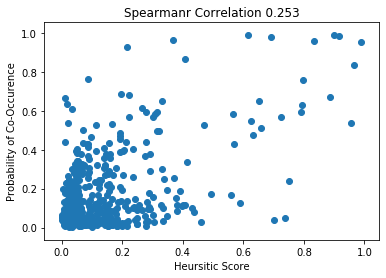

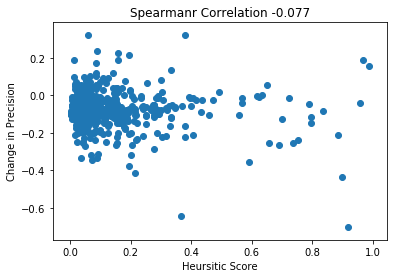

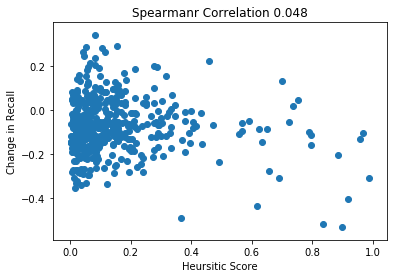

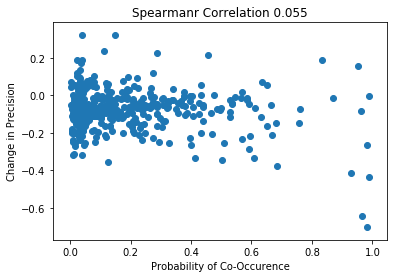

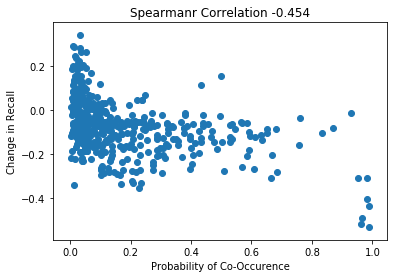

In [4]:
run(0)

sportsball-person 0.9612857813233224 0.8340062808434275 -0.08534663865546221 -0.5198142025576733
spoon-diningtable 0.5925191272315103 0.7898230088495575 -0.04396292912152466 -0.09933558551817212
bowl-diningtable 0.4775699620306567 0.6323427781617139 0.0046589070627135465 -0.14264402582723396
knife-person 0.545538603791031 0.6244343891402715 -0.0071428571428571175 -0.08505008879769642
frisbee-person 0.8337912087912088 0.9661921708185054 0.1903571428571429 -0.10201006621554773
cake-diningtable 0.5846153846153846 0.5660749506903353 -0.011249304818241601 -0.06027723630062809
skateboard-person 0.9830264672036824 0.9165554072096128 -0.7030193236714977 -0.4044979489392519
handbag-umbrella 0.16708083613506797 0.5591397849462365 -0.10593993190661477 -0.10674510280809493
handbag-train 0.05043122350533548 0.7368421052631579 -0.255896751223854 0.01974280716784465
carrot-bowl 0.42780748663101603 0.5691056910569106 -0.03921888132279039 -0.09348390446521287
knife-diningtable 0.6324549237170597 0.7950

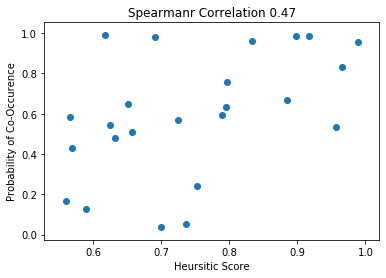

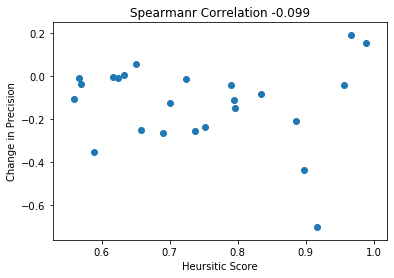

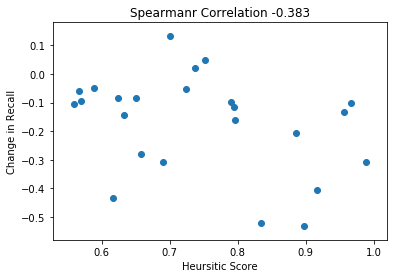

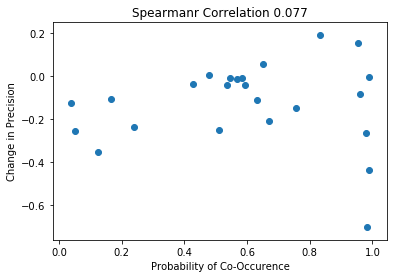

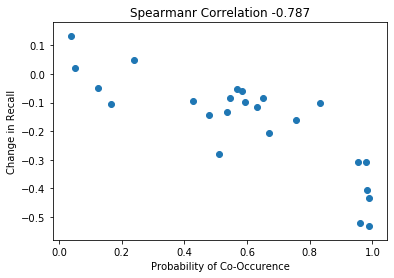

In [5]:
run(0.5, verbose = True)